# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---

* [Object Detection1 ](#Object-Detection1 )
    * [Selective Search](#Selective-Search )
    * [Object Detection Dataset ](#Object-Detection-Dataset)
    * [R-CNN ](#R-CNN )
    * [SPP-net](#SPP-net)

---
## Object Detection1

## Object Recognition
Single object 
1. image classification
  -  학습한 라벨에 따라서 주어진 이미지 라벨을 예측
2. object localization
  - 이미지속에 객체가 있는 직사각형 영역 예측
    - Supervised Learining - Regression(좌표값 예측)

Multiple Objects
1. **Object Detection** 
  - classification &  localization
    - 물체가 있을 만한 **영역 찾음**
        - window sliding/ selective search + classification
    - 영역 내에 무엇이 있는지
 
2. Semantic Segmentation
  - 모든 픽셀을 해당하는 미리 지정된 개수의 class로 분류하지만 각 인스턴스 구분을 하지 못함
3. Instance Segmentation
  - 각 class의 인스턴스 구분을

## Object Detection
-  sliding window : 물체가 존재할 수 있는 모든 크기의 영역에 대해 이미지 모두 탐색하면서 classification (Naive)
  - 경우의 수가 너무 많아서 연산시간이 오래 걸림
  - CNN: transitional invariance하나 크기,회전에 대한 경우의 수가 너무 많아서 비효율적,비실용적
     - eg. cascading classifiers ,Haar features, viola-jones algorithms
    > - 사람: 선택적 주의 집중, 문맥에 기반한 종합적 이해를 통해 직관적으로 빠르게 수행 가능

## Object Detection 데이터셋
- pandas DataFrame(platform 종속적), json,csv,xml 으로 구성 
예. MS CoCo Dataset, Pascal VOC Dataset, ImageNet

### Pascal VOC Dataset 
더 이상 공개를 하지않아서 mirror 사이트에서 다운로드 
- detection: classification + localizaiton 
    - classification Dataset: 클래스로 이름으로 된 폴더별로 이미지
    - localization Dataset:이미지 한장에 좌표값과 클래스
        - Annotation
           - json ,csv ,xml 파일
              - Image info : width, height, depth, name, pose 
              - 좌표값 4개 : xmin,ymin,xmax,ymax
- 참고 : https://pjreddie.com/projects/pascal-voc-dataset-mirror/


## Region proposals
- **유사도 기반으로 물체가 있을 법한 영역의 위치(좌표) 제안**하는 물체 탐색 알고리즘
-  전체를 탐색하는 것이 아니기 때문에 search space가 줄어들어 때문에 비교적 빠른 속도로 object detection을 수행
  eg. selective serach 
> CNN 방식 단점: 데이터가 커야해서 정확도가 안 좋은 경우가 많음 

#### Selective Search
- grouping
- 2013 :window scoring, grouping보다 획기적 속도와 정확도
- 전체 영역에서  **4가지 유사도 색상, 텍스쳐, 사이즈, fill** 기반으로 그것들을 둘러싸는 다양한 크기의 window 찾음
- **hierachial grouping** algorithm
  -  유사도 높은것끼리 서로 합쳐서 크기 점점 확장해서 물체가 있을만한 영역 잡음
      - input: image
      - output : 이미지가 있을법한 공간에 기설 공간
  - 유사도 S = 0 초기화하고 근접공간에 대한 유사도 계산해서 기준에따라서 여역을 확장여부 결정
  
- python seletive-search 설치 참고: https://pypi.org/project/selective-search/
- git: https://github.com/ChenjieXu/selective_search
    - mode: `single`, `fast`, `quality` 
    - Similarity measure :CTSF (color, texture, size, fill)
    - Starting Regions(k)

- `joblib`  동시에 convolution 하도록 sckit에서 스케줄링 최적화  
- `oversegmentation(img,k)`: util.py : skimage felzenszwalb 이전의 유명한  분리 기법 이용

In [ ]:
pip install selective-search

In [2]:
import skimage.io # Numpy 기반
from selective_search import selective_search

In [6]:
image = skimage.io.imread('desktop/ever.jpg')

In [7]:
#속도 느림
boxes = selective_search(image, mode='single', random_sort=False) #영역 빠르게 찾도록 조절 가능 

In [8]:
boxes[0] #있을 만한 영역의 점 4개

(0, 0, 600, 465)

In [9]:
from PIL import Image

In [11]:
im=Image.open('desktop/ever.jpg')

In [18]:
from PIL import ImageDraw
idraw=ImageDraw.Draw(im)
idraw.rectangle(boxes[1], outline='pink') #0전체 영역

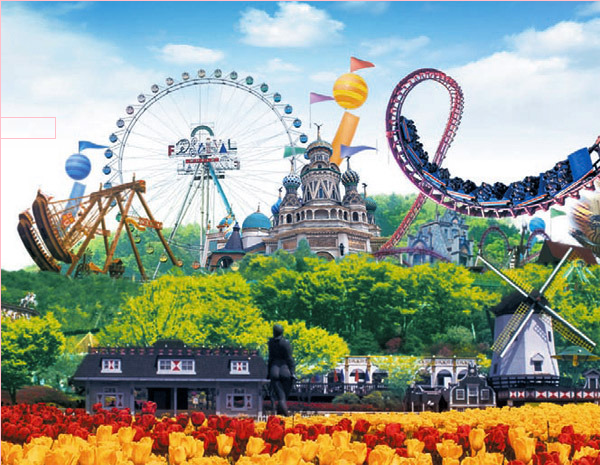

In [19]:
im 

In [24]:
len(boxes)

865

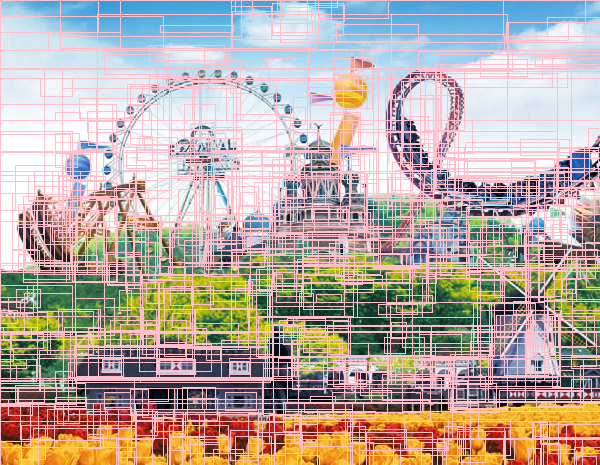

In [25]:
for i in boxes:
    idraw.rectangle(i, outline='pink')
im

In [23]:
boxes = selective_search(image, mode='fast', random_sort=False) #

In [20]:
len(boxes) # 갯수 차이 약 4.5배, 정확도가 떨어짐

3967

In [21]:
im=Image.open('desktop/ever.jpg')
idraw=ImageDraw.Draw(im)

for i in boxes:
    idraw.rectangle(i, outline='pink')

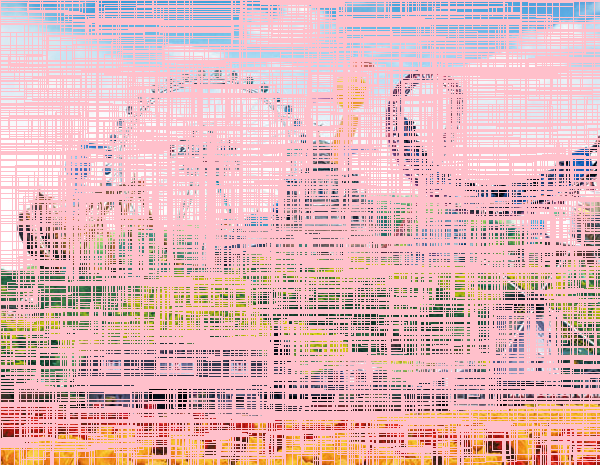

In [22]:
im

In [26]:
boxes = selective_search(image, mode='quality', random_sort=False) 

In [27]:
len(boxes)

17774

In [28]:
im=Image.open('desktop/ever.jpg')
idraw=ImageDraw.Draw(im)

for i in boxes:
    idraw.rectangle(i, outline='pink')

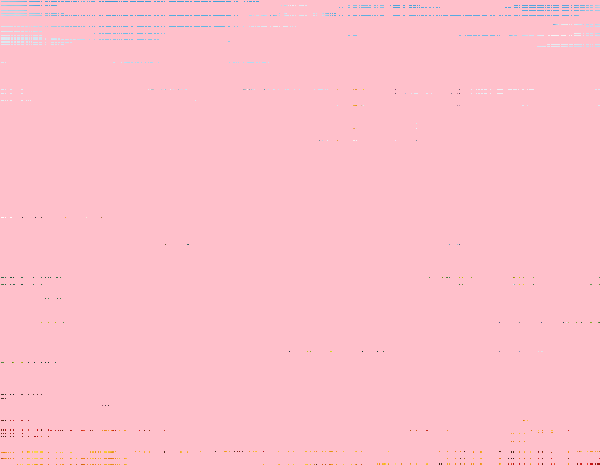

In [29]:
im  #전체를 뒤덮음

## cnn based approach(region proposal)
윈도우의 일부(하위 집합) 활용 객체 탐지 효율적

#### Single-Stage Methods
- **정해진 위치와 정해진 크기의 객체**만 찾는 방법. 
- 보통 원본 이미지를 고정된 사이즈 그리드 영역으로 나누고 각 영역에 대해 형태와 크기가 미리 결정된 객체의 고정 개수를 예측
- 2 stage 보다는 정확도가 떨어지지만 빠른 처리가 가능하기 때문에 보통 **실시간** 탐지에 활용
- CNN based object detection 필수가 됨
  - YOLO, SSD, RetinaNet  
  
#### Two-Stage Methods
- 영역 찾은 후 classification
- 객체를 포함할 가능성이 높은 영역을 Selective Search같은 Computer vision 기술을 활용하여 선택해서 제안한 윈도우 세트를 취합하면 회귀 모델과 분류 모델의 수를 공식화해 객체 탐지
  A. classification
    - CNN 
  B. localization 
    - selective search:R-CNN, SPP-net, Fast-RCNN
      - 이전에는 selective search, edge boxes 로 hand-engieered하여 병목현상으로 속도가 느림
      - resize,crop으로 데이터 왜곡

### Selective Search
논문: Selective Search for Object Recognition
- selctive sarch algorithm 
    - Capture all scales:모든 객체의 크기를 고려함
    - diversification : 다양한 조건을 고려하여 영역 후보 제안
    - faster computation: exhaustive search에 비해 빠름
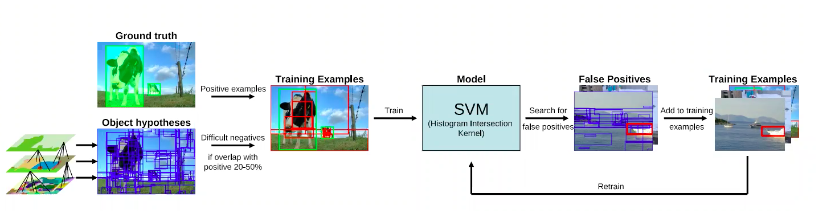
- ground truth 실제 있을 만한 곳(positive)과 20~50% 겹치는 부분(difficult negatives)도 학습 dataset 사용
- SVM model : False Positives 재학습시킴
- 이미지에 들어가고 좌표값이 들어가면 좌표값 4개점 유추

History
- ImageNet classification : AlexNet(2012) 압도적 성능

## R-CNN
- 최초로 CNN을 Detection에 이용(2013)
- Regions with CNN features
  - Regional proposal + CNN
 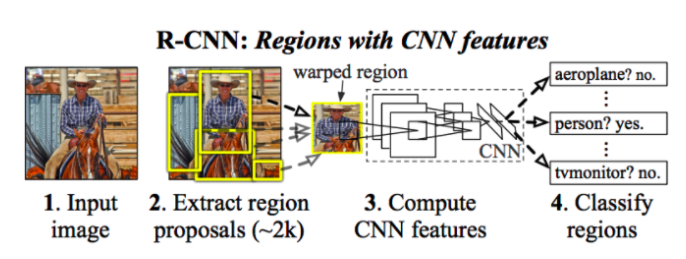 

1. limit 2k region proposals 추출(**Selective Search**)
   - 순차적으로 CNN 수행하여 속도가 느림
   - GPU 에 부적합
2. CNN (**AlexNet**)
   - AlexNet 전이학습을 하여 입력이미지가 224*224로 고정되어있어 crop,resize 로인해 이미지 왜곡으로 인한 성능 저하
  - feature extraction
  - localization 성능좋지 못함 
      - positional/transitional invariant 위치에 무관하여 어디에 위치해도 높은 분류 성능을 내나 정확한 위치를 찾아내기에는 부족
    1. pre-train CNN for iamge Classificaiton(Transfer Laerning)
      - ImageNEt
    2. Alexnet finetuning for object detection
      - PASCAL VOC (작은 데이터)
      - 데이터 추가 학습
    3. train linaer predictor for object detection
      - warped/resized winows/image: 강제 resizing
        - AlexNEt 전이 학습하여서 강제로 224 크기 맞춤
        - 2000개 region
       - cnn features, selecive serach이용한 detection , classification은 CNN
3. SVM
  - 각 region proposal feature에 대한 classification 
  - FCNN, Flatten으로도 충분
  - GPU 에 부적합
4. b-box regressor
    - 검출된 객체의 영역을 알맞은 크기의 사각형 영역으로 표시하고 위치 파악
    -   IOU: Intersection of Union
      - 실제 값, 예측값 학습시켜서 차이를 가장 작게하도록 학습

문제점
- feature extraction ,classification, regression 3개 모델 학습 어려움
> 별개의 모델 연결보다는 end-to-end model이 더 효율적

### R-CNN 구현
 
1. 데이터셋 불러오기
2. CNN +SVM 모델 합치기
  - transfer learning(include_top=False)
  - 입출력 맞춤

In [9]:
# keras 실력!
import tensorflow as tf
vgg = tf.keras.applications.VGG16(include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [11]:
vgg.summary()   

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [15]:
model=tf.keras.models.Sequential([
                                  tf.keras.Input( (224,224,3)),
                                  vgg, 
                                  tf.keras.layers.GlobalAvgPool2D()
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [18]:
from sklearn.svm import SVC #scikit의 svm

In [ ]:
model( image )
model.predict(image)
svm=SVC()
svm.fit() #컨볼루션 지나간 데이터셋을 넣어서 연결

#selective search 나온 이미지 - b-box 좌표값, 데이터셋 생성해서 모델을 따로 2개 만들어야함 

- 모델 구현은 문제가 안 됨
SVM 안쓰고 구현

In [19]:
#SPPNEt: spatial pyramid pooling layer
dir(tf.keras.layers) #기본으로 제공해주는 layer 에서는 없음  -> 이미 만들어진 거 기반으로  "상속"  

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'Global

- CNN, R-CNN은 Fully connected layer 때문에 입력의 크기가 고정되야함  

## SPP-net 
- Kaiming He SPPNet(2014) ,ResNet(2015)
- Spatial pyramid pooling in DCNN for visual recognotion
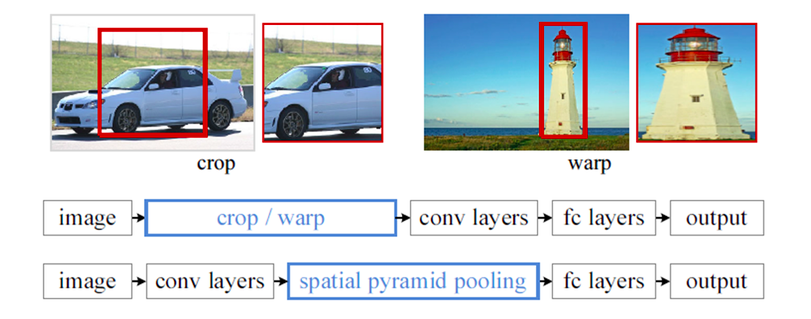
- **cropping,warping 문제점** 해결하기 위해서 **입력 이미지 크기 맞추지 않아도 CNN 적용** 할 수 있도록 **Spatial pyramid pooling(SPP)*으로 영상 크기 대응
- 마지막 convolution 레이어의 feature map에서 activation강도와 spatial information 포함하므로 convolution 다음에 pooling

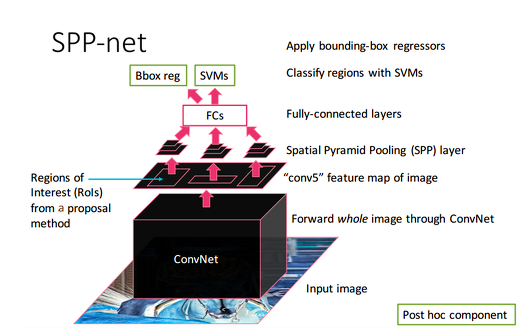

#### BoW(bag-of-Words)
> - 자연어처리에서 글에서 포함된 단어들의 분포를 보고 문서를 자동 분류
- 영상처리에서는 아마지 분류,검색, 인식에 사용

1. feature extraction
2. k means clustering
    - 추출된 feature 군집화, 대표적 특징( cluster center) 찾음
3. codebook generation
    - 물체 인식에 중요한 주요 feature를 대표할 수 있는 코드로 구성되는 코드북 
4. image representation
    - codebook 이용 이미지의 특징을 추출한 후 추출된 각각의 특징들에 대해 코드북 내에서 대응하는 코드워드 찾음
    - 코드워드들의 히스토그램으로 이미지 특징 표현
    - 각각의 코드워드가 이미지에서 나타난 갯수
5. Learning and recognition
    - disciminative : feature vector로 해석하여 SVM classifier
    - generative : 확률로 해석해여 Beyesian 
    
    - 이미지를 여러개의 일정 개수의 지역으로 나눈 뒤, 각 지역에 BoW를 적용하여 지역적인 정보를 어느정도 유지
    - 크기 조각별로 매칭하는 기법

- 이미지를 여러 단계의 resolution으로 분할 후, 각 단계의 분할영역마다 히스토그램을 구하여 이들을 전체적으로 비교하면 pyramid 형성되며 비교하여 두 이미지의 유사도 측정함
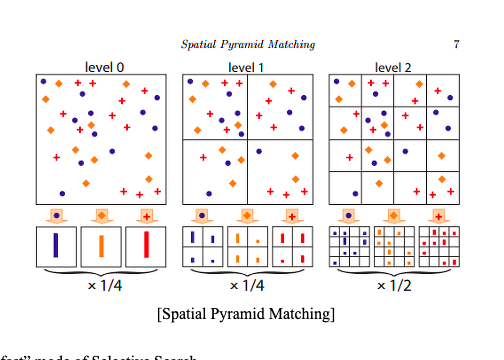

#### Spatial pyramid pooling
- convolution의 feature map을 정해진 숫자로 분할하고 각각 pooling(영역은 작아지면서 특징 유지) 하여 RoI(Region of Interst) 찾
    1. 영상 전체를 커버할 수 있도록 1x1 pooling
    2. 영상을 4개의 영역으로 구분한 2x2 pooling
    3. 영상을 9개의 영역으로 구분은 3x3 pooling 

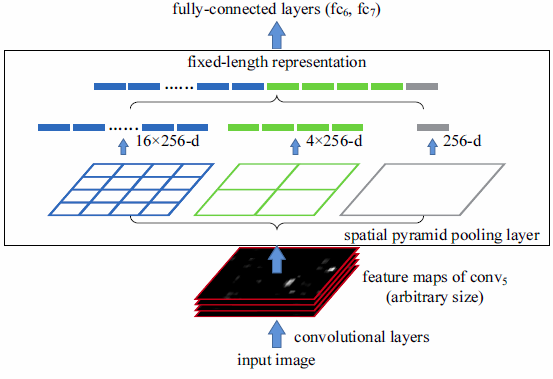
- 위치별로 어떤 특징이 많은지 위치 추가된 특징을 알 수 있어서 detection에서 proposal 이 더 좋아짐

##  SPP 레이어 구현

### 사용자 정의 layer
- 참고: https://www.tensorflow.org/tutorials/customization/custom_layers?hl=ko
- 기본으로 제공하지 않는경우 `tf.keras.layers.Layer` 상속해서 학습에 필요하면 사용자 정의 layer 만들어야함
  - 학습 불필요하면 Lamba layer 로 해결
  

- __init__ 클래스 인스턴스 실행시 초기화
    -  *arg, **kwargs 인자  상관없이 받아서 초기화시 편리
- build summary 전에 갯수 자동적으로 맞춰줌
- call
  - 인스턴스 () 한 경우 내부적으로__call__ 부름 

In [ ]:
tf.keras.layers.Layer #기본 레이어 상속 받음

In [2]:
import tensorflow as tf
class SPPLayer(tf.keras.layers.Layer):
  #초기화  
  def __init__(self,num_outputs):
    super(SPPLayer, self).__init__()
    self.num_outputs=num_outputs

In [3]:
spp=SPPLayer(3)

In [4]:
spp()

ValueError: The first argument to `Layer.call` must always be passed.

tf.keras.layers.Layer `__build__`,`__call__` 있어서 `build`, `call` 오버로딩

In [ ]:
class SPPLayer(tf.keras.layers.Layer):
  #초기화 ,   
  def __init__(self, *arg, **kwargs):
    super().__init__(*arg, **kwargs)

  def __build__(self,x):
    print('build')

  def __call__(self, x):
    print('call')

In [30]:
#가장 기본적 구조 

class SPPLayer(tf.keras.layers.Layer):
 
  def __init__(self, *arg, **kwargs):
    super().__init__(*arg, **kwargs)
  # 오버로딩
  def build(self,x):
    print('build')
  def call(self, x):
    print('call')

In [32]:
spp=SPPLayer() 

- 인스턴스() -> build(한번만 실행됨, 실행 되어있으면 skip -> call
- build는 1번만 불리기 때문에 optional
- 레이어 값 전달 함수형 패러다임
    - 입력값 받아서 행렬곱해서 다음 레이어 전달해서 output 전달해줄값 만듦

In [35]:
spp(3) 

build
call


In [37]:
spp(4) #이미 한번 실행되서 build 안 부름 

call


- image 전체 pooling
  - max pooling
   1. tf.keras.layers.Max
   2. tf.keras.backend
    - keras 에서  쓸 수 있는 함수, class 제공
    - 동일하게 지원하는 기능 외로 각 프레임워크별로 지원되는 기능 
    - 각 차이점을 맞춰서 실행하게 해주도록 함 tf, tiano,CNTK
    - 차이가 날만한 메소드 : 기본적 연산은 차이가 남 , 케라스에서 사용 가능한 함수, 메소드 제공
- filter갯수 만큼 convolution
> R-CNN : resize,warping 

In [38]:
from tensorflow.keras import backend as K
#지금은 tf전용이지만 이전에는 tf, tiano, CNTK - 각 프레임 워크별 지원하는 기능 (내부적으로 차이점을 맞춰줘서 실행시키게 해줌) 함수,클래스 제공 

### backend
내부적으로 tf 자제적으로 없는 메소드가 있는데 같은 메소드라도 keras, tf 상이함
- 케라스: 넘파이 기반
- 텐서플로우: 텐서 기반

In [40]:
dir(K) 

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'abs',
 'all',
 'any',
 'arange',
 'argmax',
 'argmin',
 'backend',
 'batch_dot',
 'batch_flatten',
 'batch_get_value',
 'batch_normalization',
 'batch_set_value',
 'bias_add',
 'binary_crossentropy',
 'cast',
 'cast_to_floatx',
 'categorical_crossentropy',
 'clear_session',
 'clip',
 'concatenate',
 'constant',
 'conv1d',
 'conv2d',
 'conv2d_transpose',
 'conv3d',
 'cos',
 'count_params',
 'ctc_batch_cost',
 'ctc_decode',
 'ctc_label_dense_to_sparse',
 'cumprod',
 'cumsum',
 'depthwise_conv2d',
 'dot',
 'dropout',
 'dtype',
 'elu',
 'epsilon',
 'equal',
 'eval',
 'exp',
 'expand_dims',
 'eye',
 'flatten',
 'floatx',
 'foldl',
 'foldr',
 'function',
 'gather',
 'get_uid',
 'get_value',
 'gradients',
 'greater',
 'greater_equal',
 'hard_sigmoid',
 'image_data_format',
 'in_test_phase',
 'in_top_k',
 'in_train_phase',
 'int_shape',
 'is_keras_tensor',
 

In [45]:
#동일한 메소드라도 케라스에서 제공하는것과 tf 제공하는것이 다름
K.maximum is tf.maximum 

False

In [46]:
import numpy as np
np.max([1,2,3]) #원소간 비교

3

In [50]:
np.maximum([1,2,3],[4,5,6])

array([4, 5, 6])

In [51]:
tf.reduce_max([1,3,1,2,5,6,] ) #하나로 줄여 나가면서 가장 큰 값

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [53]:
K.max

<function tensorflow.python.keras.backend.max>

In [ ]:
class SPPLayer(tf.keras.layers.Layer):

  def __init__(self, filters *arg, **kwargs):
    self.filters=filters
    super().__init__(*arg, **kwargs)
  
    
  # 값 집어 넣을때 output 값 전달
  def call(self, x):
    outputs=[]
    
    for f in self.filters(): #filter 갯수만큼 해야함  , 이미지 shape
        K.max   #return -> output 맞추면서 concatnate  (numpy: stack,concat)
        win_size=K.int_shape
    return K.concatnate(outputs)

### shape
- 분할하기 위해서 필요
    - 1 개 : shape 
    - 2 개 : shape/2  
- 각각의 영역에서 max pooling 가능   
flatten 1차원  특별한 부분을 convolution 하면

In [54]:
### shape
np.array([[1,2,3]]).shape

(3,)

In [60]:
#크기를 int로 리턴
h,w= K.int_shape(np.array([[1,2,3]]))  # unpacking
h/2, w/2   

(0.5, 1.5)

### stride
- 3x3 Flatten
- 넘파이 데이터 저장 관리- > max 빨리 구할 수 있음 

In [12]:
### stride
a=np.arange(1,10) #1열로 관리 
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
a.strides  # stride로 n차원 만듦  -> 빠르게 관리 가능

(8,)

In [10]:
a=a.reshape(3,3)
a.strides

(24, 8)

In [11]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [2]:
class SPPLayer(tf.keras.layers.Layer):

    def __init__(self, pool_list, **kwargs):

        self.pool_list = pool_list

        self.num_outputs_per_channel = sum([i * i for i in pool_list])

        super(SpatialPyramidPooling, self).__init__(**kwargs)

    def build(self, input_shape):
            self.nb_channels = input_shape[3]

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.nb_channels * self.num_outputs_per_channel)

    def get_config(self):
        config = {'pool_list': self.pool_list}
        base_config = super(SpatialPyramidPooling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def call(self, x, mask=None):

        input_shape = K.shape(x)


        for pool_num, num_pool_regions in enumerate(self.pool_list):
            for jy in range(num_pool_regions):
                for ix in range(num_pool_regions):
                    x1 = ix * col_length[pool_num]
                    x2 = ix * col_length[pool_num] + col_length[pool_num]
                    y1 = jy * row_length[pool_num]
                    y2 = jy * row_length[pool_num] + row_length[pool_num]

                    x1 = K.cast(K.round(x1), 'int32')
                    x2 = K.cast(K.round(x2), 'int32')
                    y1 = K.cast(K.round(y1), 'int32')
                    y2 = K.cast(K.round(y2), 'int32')

                    new_shape = [input_shape[0], y2 - y1,
                                 x2 - x1, input_shape[3]]

                    x_crop = x[:, y1:y2, x1:x2, :]
                    xm = K.reshape(x_crop, new_shape)
                    
                    pooled_val = K.max(xm, axis=(1, 2))
                    outputs.append(pooled_val)

        outputs = K.concatenate(outputs)
       
        return outputs